https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/

В искусственном интеллекте и машинном обучении — задача разделения множества наблюдений (объектов) на группы, называемые классами, на основе анализа их формального описания. При классификации каждая единица наблюдения относится определенной группе или номинальной категории на основе некоторого качественного свойства.

Задача классификации применяется во многих областях:

- в торговле — классификация клиентов и товаров позволяет оптимизировать маркетинговые стратегии, стимулировать продажи, сокращать издержки

- в сфере телекоммуникаций — классификация абонентов позволяет определять уровень лояльности, разрабатывать программы лояльности

- в медицине и здравоохранении — диагностика заболеваний, классификация населения по группам риска

- в банковской сфере — кредитный скоринг.

In [3]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns

C:\Users\peres\anaconda3\envs\bmstu\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\peres\anaconda3\envs\bmstu\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\peres\anaconda3\envs\bmstu\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


#### Чтение и осмотр данных

In [5]:
df = pd.read_csv('data/diabetes.csv', delimiter=',')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pregnancies: количество беременностей

Glucose: концентрация глюкозы в плазме через 2 часа в пероральном тесте на толерантность к глюкозе.

BloodPressure: диастолическое артериальное давление

SkinThickness: толщина кожной складки трицепса

Insulin: инсулин сыворотки после приема пищи

BMI: индекс массы тела

DiabetesPedigreeFunction: функция диабетической семьи

Age: Возраст

diabetes: цель, 0 означает отсутствие болезни, 1 означает болезнь

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   diabetes                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df["diabetes"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [9]:
df.diabetes.value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

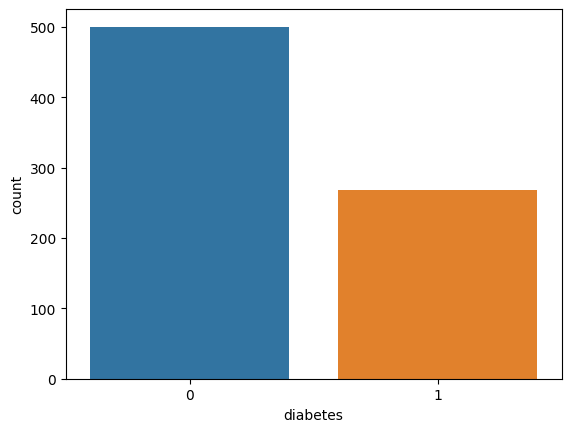

In [10]:
sns.countplot(x='diabetes', data=df);

In [11]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
diabetes                      int64
dtype: object

#### Заполнение пропусков медианой

In [12]:
dataframe_temp = df.drop(["Pregnancies", "diabetes"],axis = 1)
dataframe_temp

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [13]:
medians = dataframe_temp.median()
print("medians", medians)

medians Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
dtype: float64


In [14]:
dataframe_nonzero = dataframe_temp.replace(0, medians)
dataframe_nonzero

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,30.5,33.6,0.627,50
1,85,66,29,30.5,26.6,0.351,31
2,183,64,23,30.5,23.3,0.672,32
3,89,66,23,94.0,28.1,0.167,21
4,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180.0,32.9,0.171,63
764,122,70,27,30.5,36.8,0.340,27
765,121,72,23,112.0,26.2,0.245,30
766,126,60,23,30.5,30.1,0.349,47


In [15]:
dataframe_nonzero["Pregnancies"] = df["Pregnancies"]
dataframe_nonzero["diabetes"] = df["diabetes"]
dataframe_nonzero

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,diabetes
0,148,72,35,30.5,33.6,0.627,50,6,1
1,85,66,29,30.5,26.6,0.351,31,1,0
2,183,64,23,30.5,23.3,0.672,32,8,1
3,89,66,23,94.0,28.1,0.167,21,1,0
4,137,40,35,168.0,43.1,2.288,33,0,1
...,...,...,...,...,...,...,...,...,...
763,101,76,48,180.0,32.9,0.171,63,10,0
764,122,70,27,30.5,36.8,0.340,27,2,0
765,121,72,23,112.0,26.2,0.245,30,5,0
766,126,60,23,30.5,30.1,0.349,47,1,1


In [16]:
corr = dataframe_nonzero.corr()
corr.T

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,diabetes
Glucose,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.128213,0.492782
BloodPressure,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.208615,0.165723
SkinThickness,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.032568,0.189065
Insulin,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,-0.055697,0.148457
BMI,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.021546,0.312249
DiabetesPedigreeFunction,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,-0.033523,0.173844
Age,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.544341,0.238356
Pregnancies,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,1.000000,0.221898
diabetes,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,0.221898,1.000000


<Axes: >

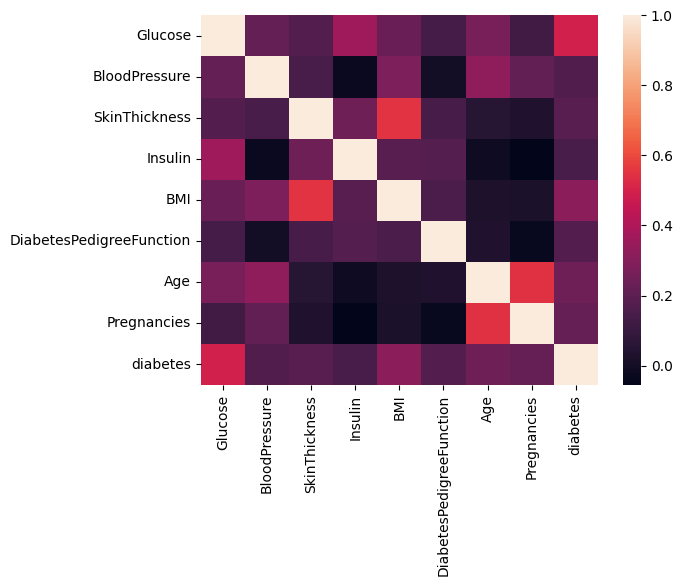

In [17]:
sns.heatmap(corr)

C:\Users\peres\anaconda3\envs\bmstu\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


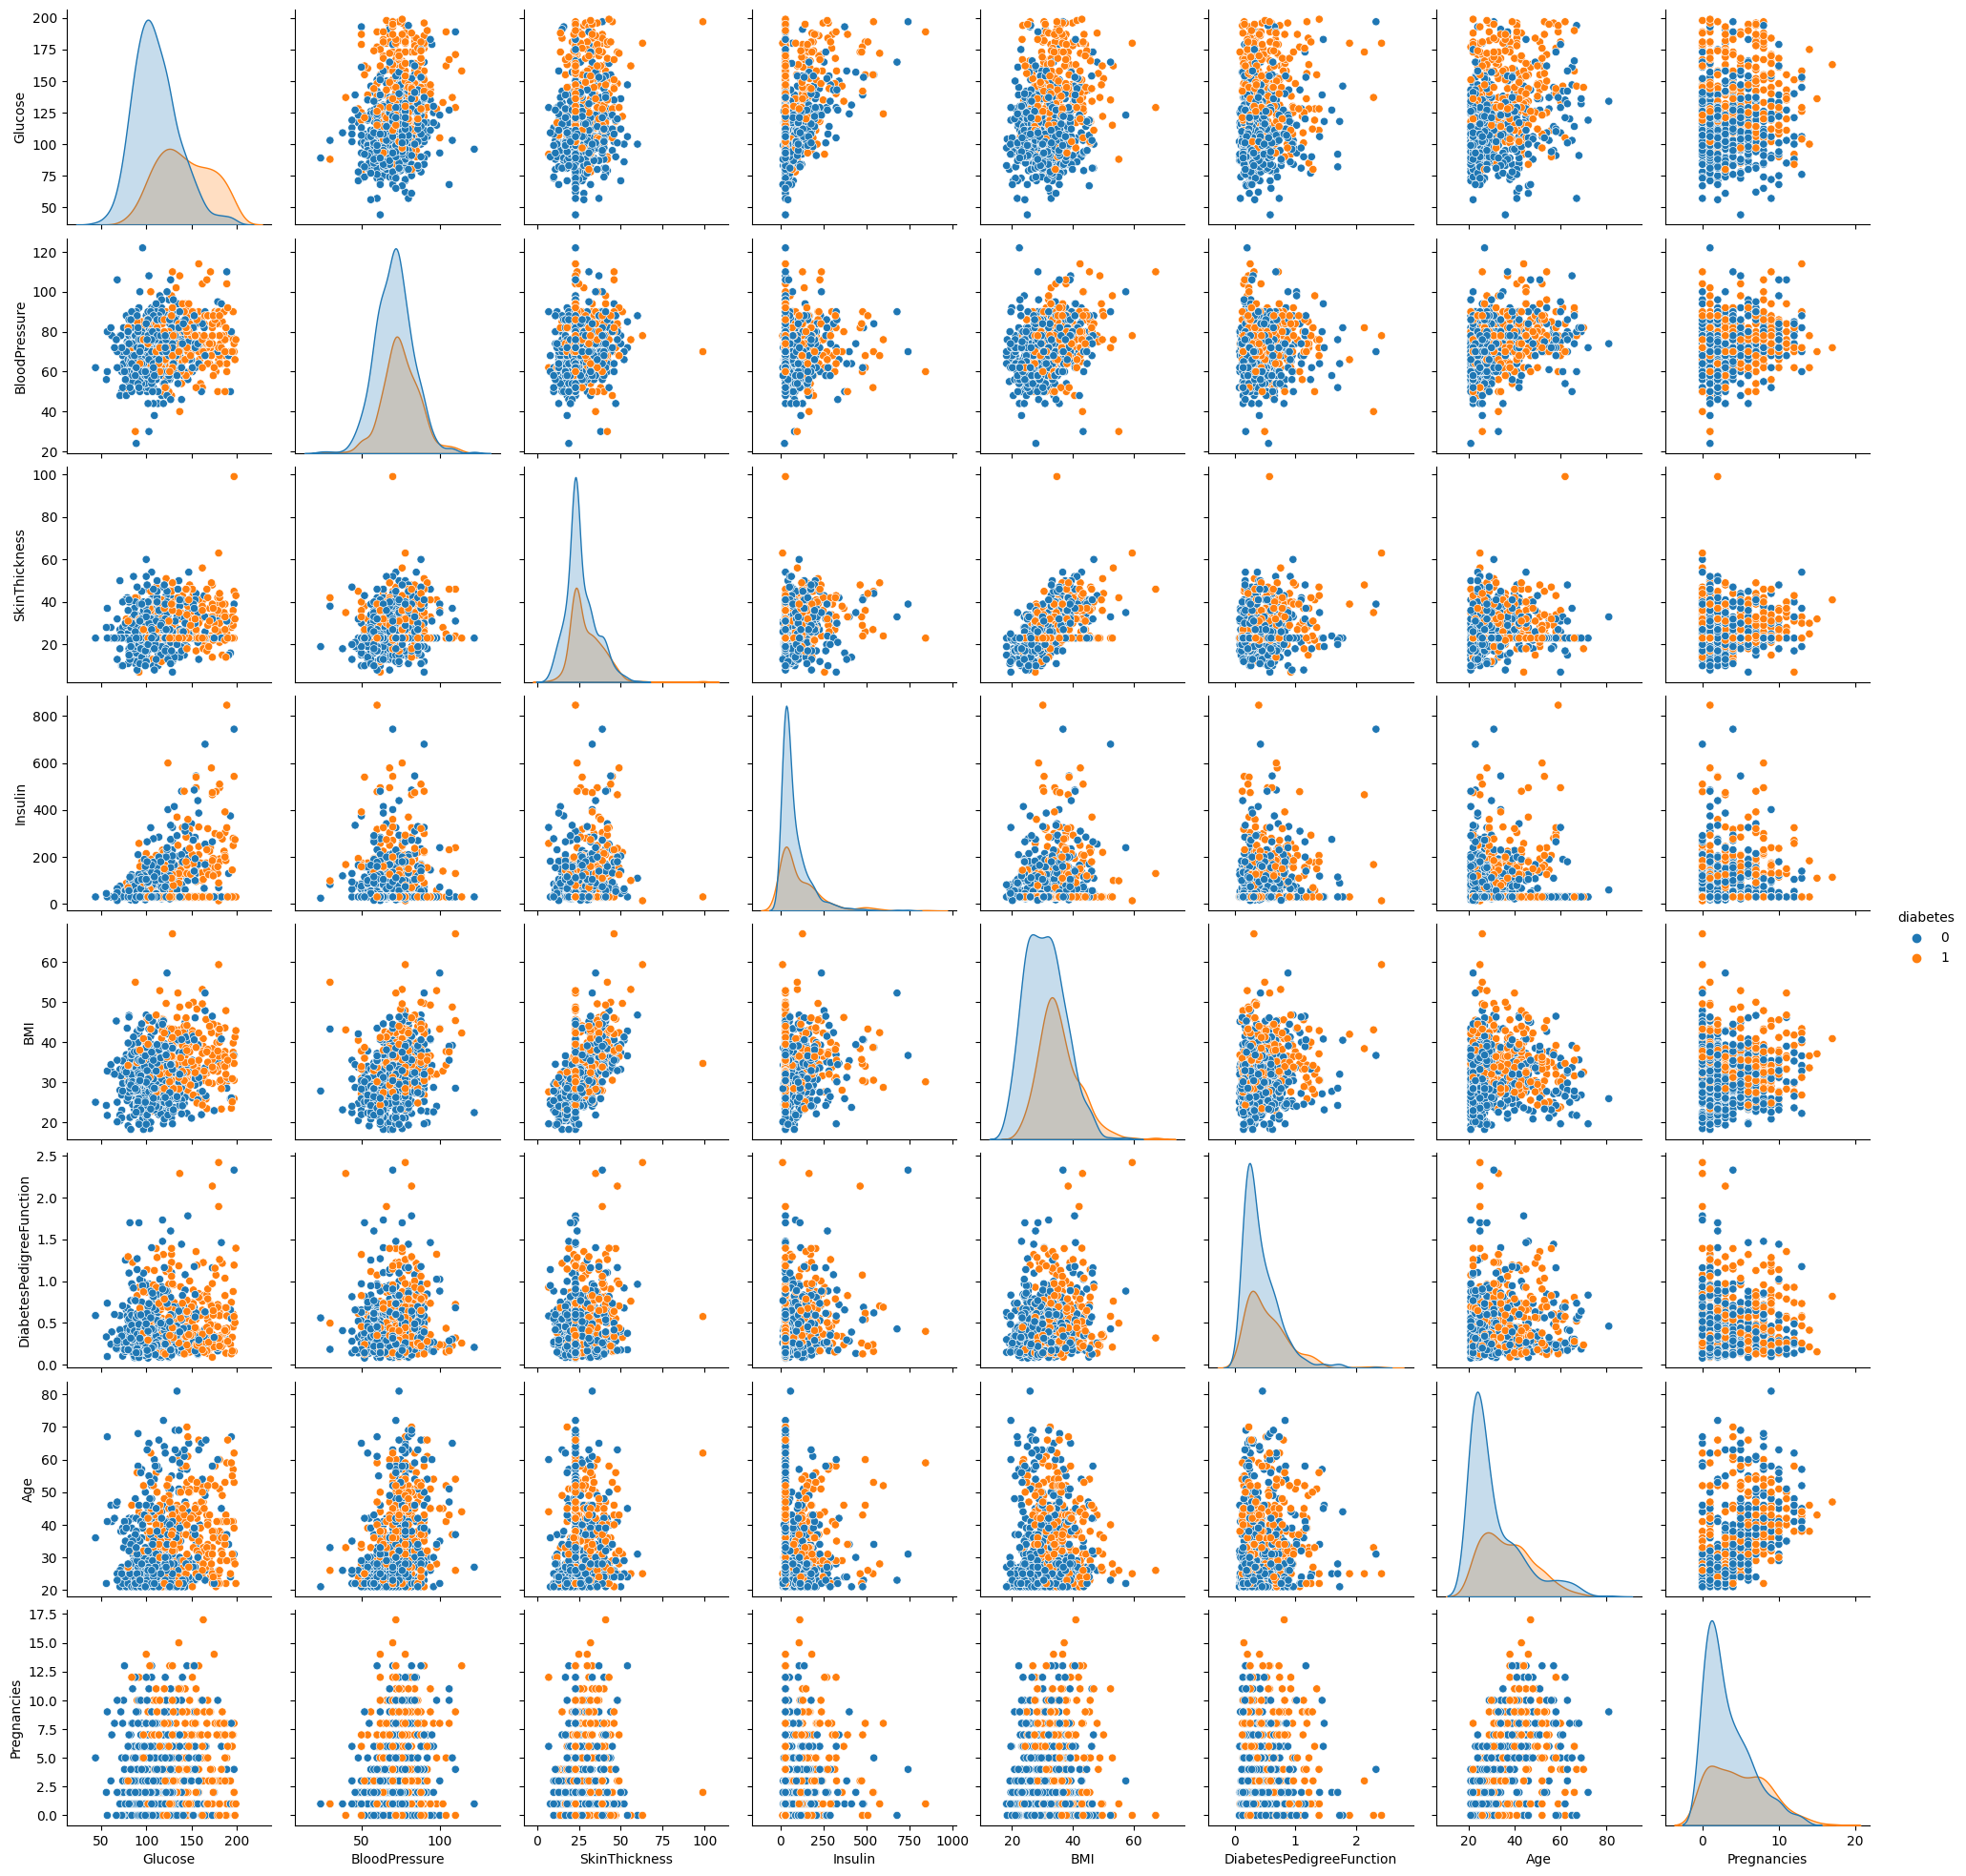

In [18]:
sns.pairplot(dataframe_nonzero, diag_kind='kde', hue="diabetes");

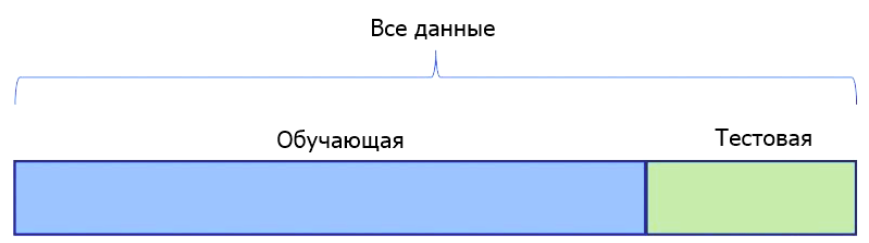

Важная проблема - переобучение

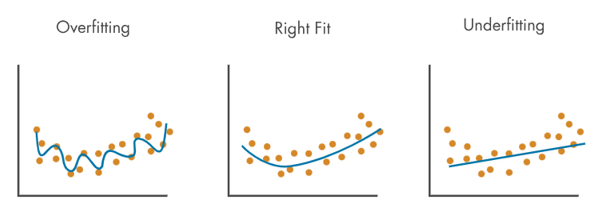

In [20]:
from sklearn.model_selection import train_test_split
X = dataframe_nonzero.drop('diabetes', axis=1)
y = dataframe_nonzero['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

Как выглядит перекрестная проверка

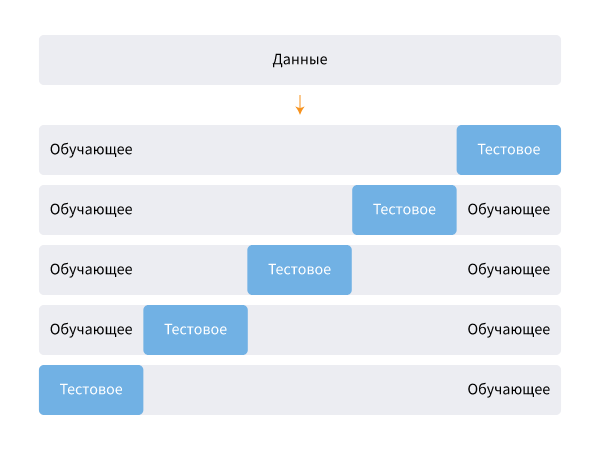

In [24]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
kf.get_n_splits(X)
print(kf)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(i)
    print(train_index)

KFold(n_splits=2, random_state=None, shuffle=False)
0
[384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401
 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419
 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437
 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455
 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473
 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491
 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509
 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527
 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545
 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563
 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581
 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599
 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 6

In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
scores

In [37]:
np.mean(scores)

0.7070622188269248

А если у модели есть гиперпараметры?

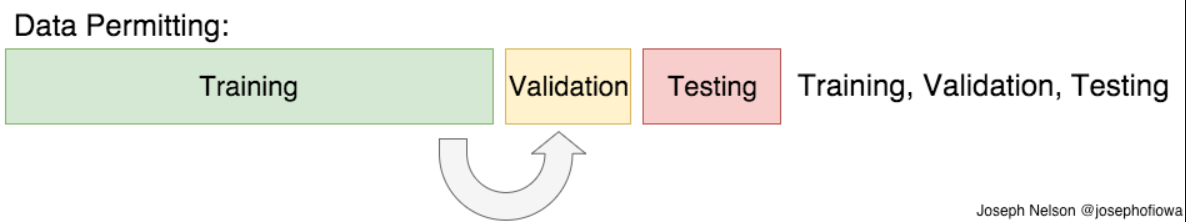

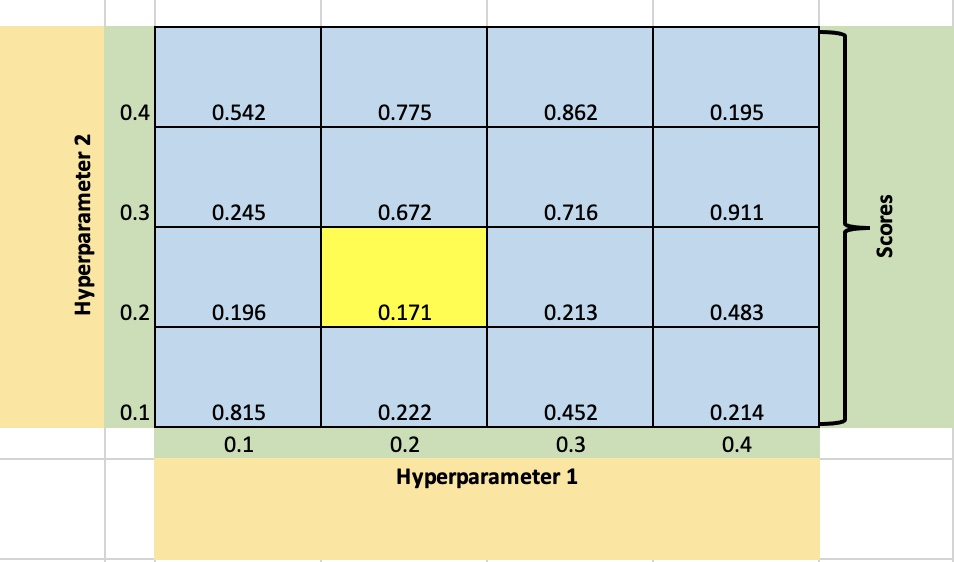

Подбор параметров с кросс валидацией

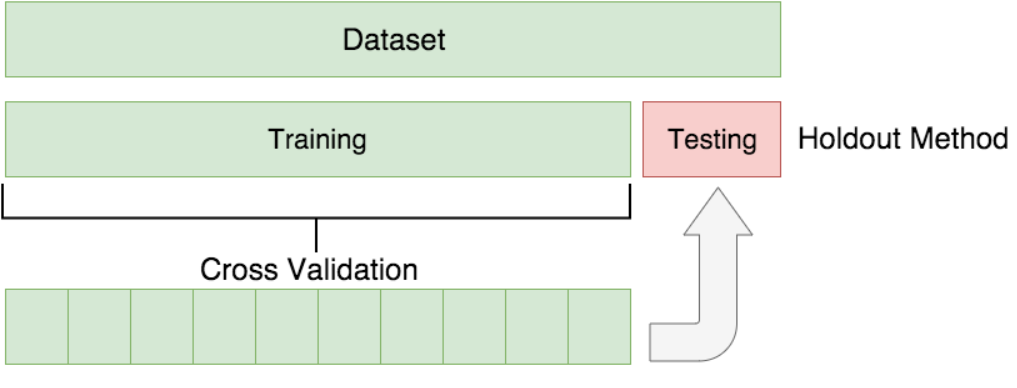

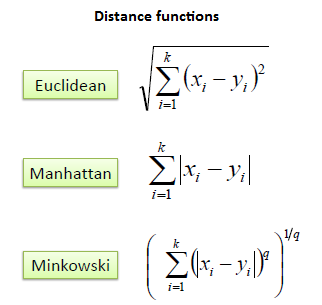

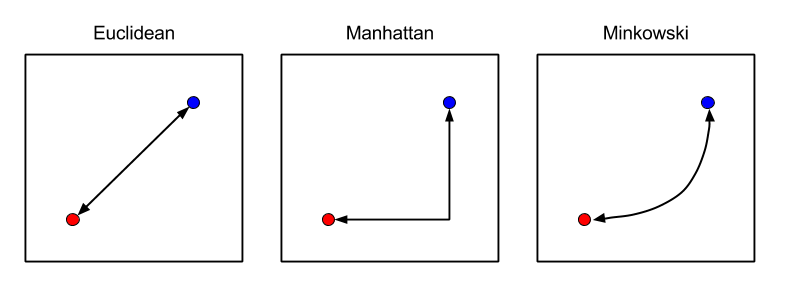

In [38]:
n_neighbors = list(range(1, 30))
weights = ["uniform", "distance"]
p = [1, 2]

hyperparameters = dict(n_neighbors=n_neighbors, weights=weights, p=p)
print(hyperparameters)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance'], 'p': [1, 2]}


In [40]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
search = GridSearchCV(knn, hyperparameters, cv=10, verbose=1)

In [41]:
best_model = search.fit(X_train, y_train)

Fitting 10 folds for each of 116 candidates, totalling 1160 fits


In [42]:
best_model.best_estimator_

KNeighborsClassifier(n_neighbors=19, p=1, weights='distance')

In [44]:
knn = best_model.best_estimator_
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [45]:
accuracy_score(y_test, y_pred)

0.7878787878787878

Добавим нормализацию

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
best_model = search.fit(X_train_scaled, y_train)
knn = best_model.best_estimator_
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
y_pred

Fitting 10 folds for each of 116 candidates, totalling 1160 fits


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [48]:
accuracy_score(y_test, y_pred)

0.7792207792207793

Преобразуем к стандартному виду

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
best_model = search.fit(X_train_scaled, y_train)
knn = best_model.best_estimator_
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
y_pred

Fitting 10 folds for each of 116 candidates, totalling 1160 fits


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [53]:
accuracy_score(y_test, y_pred)

0.7705627705627706

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)  
cm = confusion_matrix(y_test, y_pred)
cm

array([[120,  26],
       [ 30,  55]], dtype=int64)

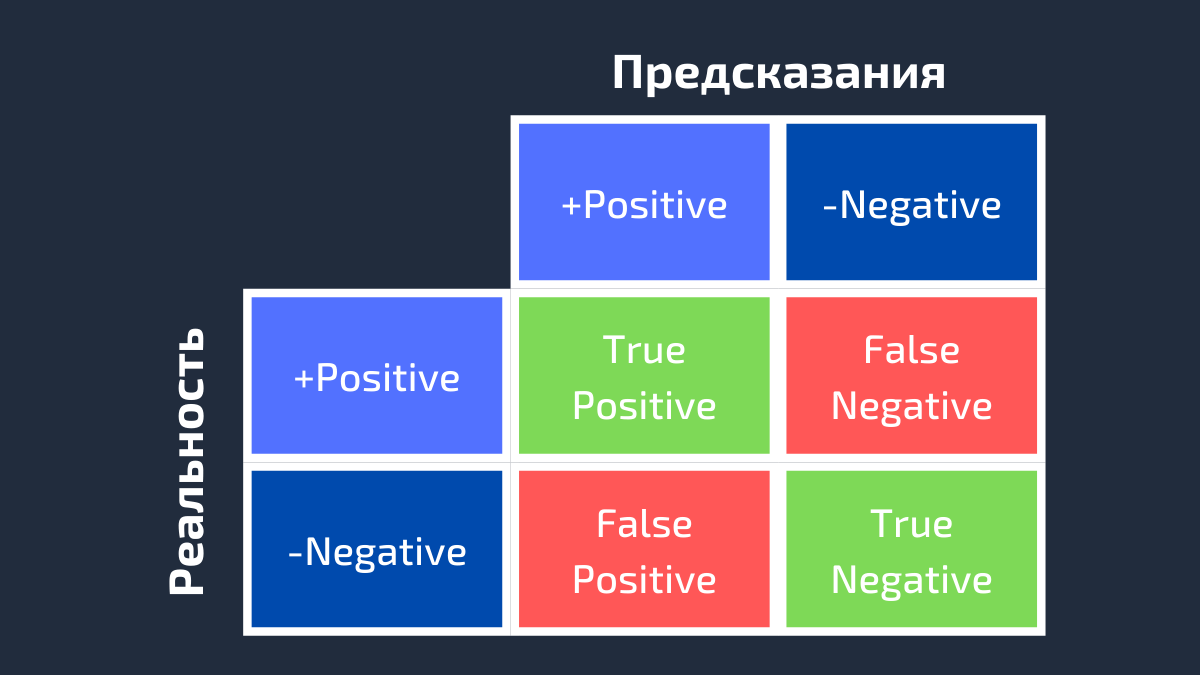

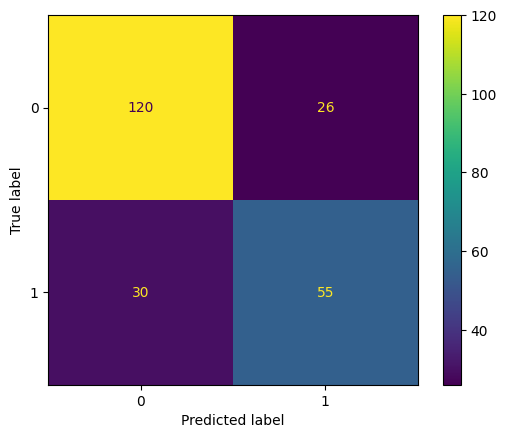

In [57]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

True Positive Rate (TPR) показывает, какой процент среди всех positive верно предсказан моделью.
TPR = TP / (TP + FN).

False Positive Rate (FPR): какой процент среди всех negative неверно предсказан моделью.
FPR = FP / (FP + TN).

https://pythonru.com/baza-znanij/sklearn-roc-auc

In [60]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [64]:
import matplotlib.pyplot as plt

In [67]:
lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('ROC AUC для модели: %.3f' % (lr_auc))
fpr, tpr, treshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)

ROC AUC для модели: 0.792


In [72]:
treshold

array([       inf, 1.        , 0.66666667, 0.33333333, 0.        ])

In [70]:
fpr

array([0.        , 0.00684932, 0.17808219, 0.45890411, 1.        ])

In [71]:
tpr

array([0.        , 0.30588235, 0.64705882, 0.84705882, 1.        ])

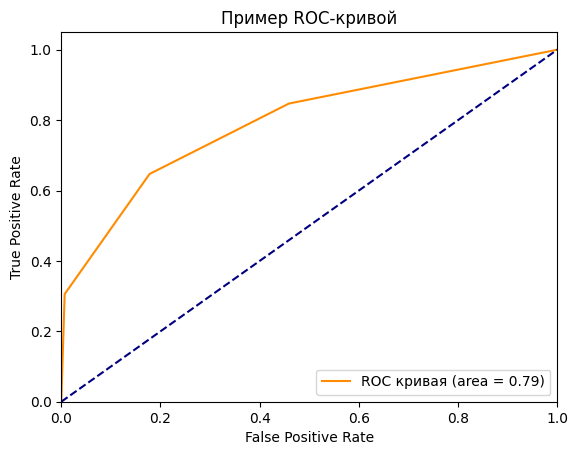

In [68]:
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

In [74]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = treshold[optimal_idx]

In [75]:
optimal_threshold

0.6666666666666666

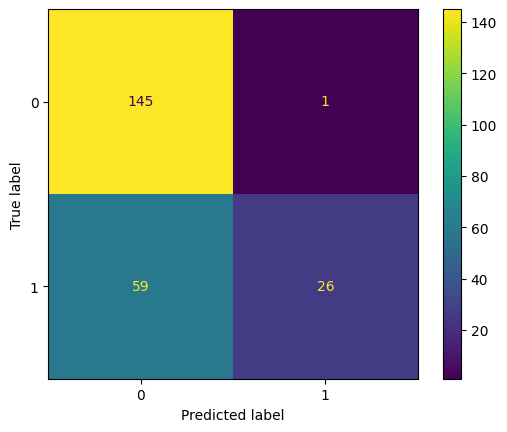

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict_proba(X_test)[:, 1] > optimal_threshold 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

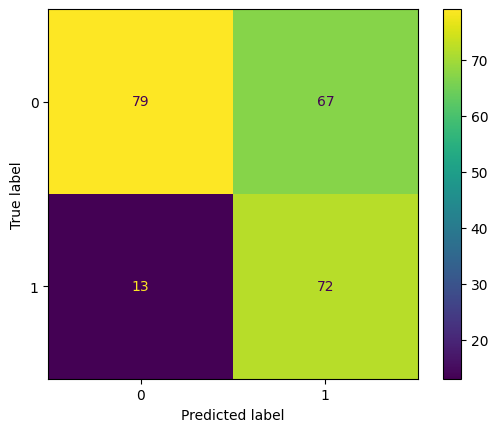

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict_proba(X_test)[:, 1] >= treshold[3] 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html

Построение дерева происходит по следующему алгоритму:

1. Выбирается признак, по которому происходит разделение выборки.
2. Выбирается пороговое значение для этого признака.
3. Разделяется выборка на две части: объекты, у которых значение признака меньше или равно порогу, и объекты, у которых значение признака больше порога.
4. Для каждой из двух полученных подвыборок рекурсивно повторяются шаги 1-3, пока не будет достигнут критерий останова (например, глубина дерева, количество объектов в листе и т.д.).
5. В листе дерева выводится ответ — класс.

In [120]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(42)

param_grid = {'max_features': ['sqrt', 'log2'],
              'max_depth' : [2, 3],
              'criterion' :['gini', 'entropy']
             }
dec_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dec_tree, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)
best_dec_tree = grid_search.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [123]:
score = accuracy_score(y_test, best_dec_tree.predict(X_test))
print("accuracy:", score)

accuracy: 0.7532467532467533


In [125]:
from sklearn import tree

text_representation = tree.export_text(best_dec_tree)
print(text_representation)

|--- feature_0 <= 129.50
|   |--- feature_5 <= 0.64
|   |   |--- class: 0
|   |--- feature_5 >  0.64
|   |   |--- class: 0
|--- feature_0 >  129.50
|   |--- feature_4 <= 27.85
|   |   |--- class: 0
|   |--- feature_4 >  27.85
|   |   |--- class: 1



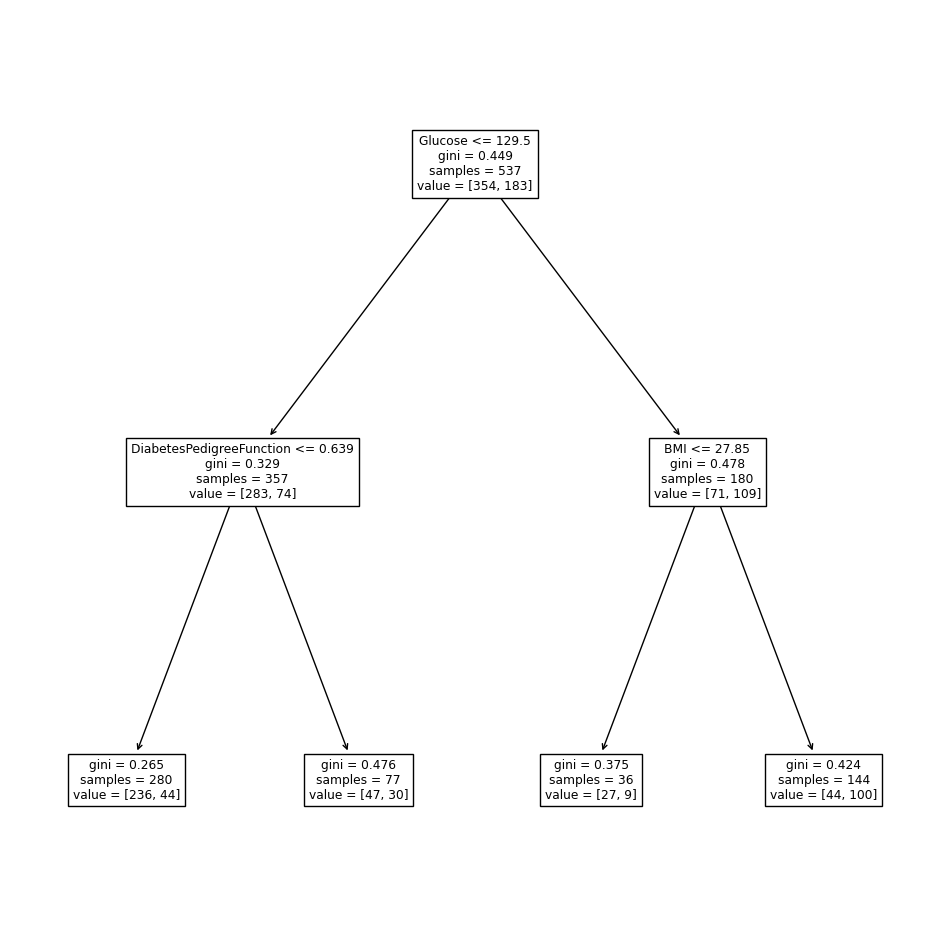

In [126]:
plt.figure(figsize=(12,12))
tree.plot_tree(best_dec_tree, feature_names=list(df.columns[1:]));

Логистическая регрессия

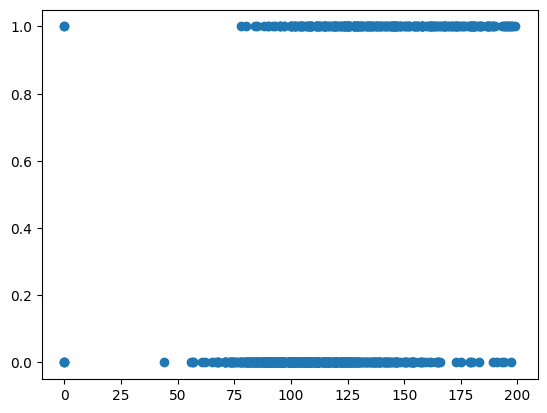

In [94]:
plt.scatter(df["Glucose"].values, df["diabetes"])

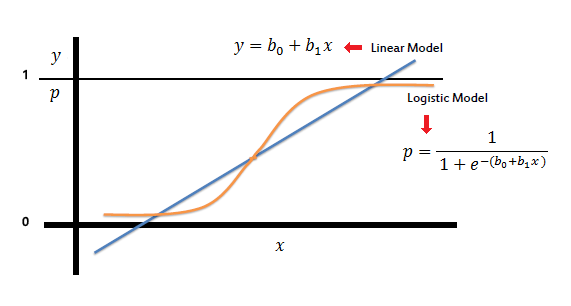

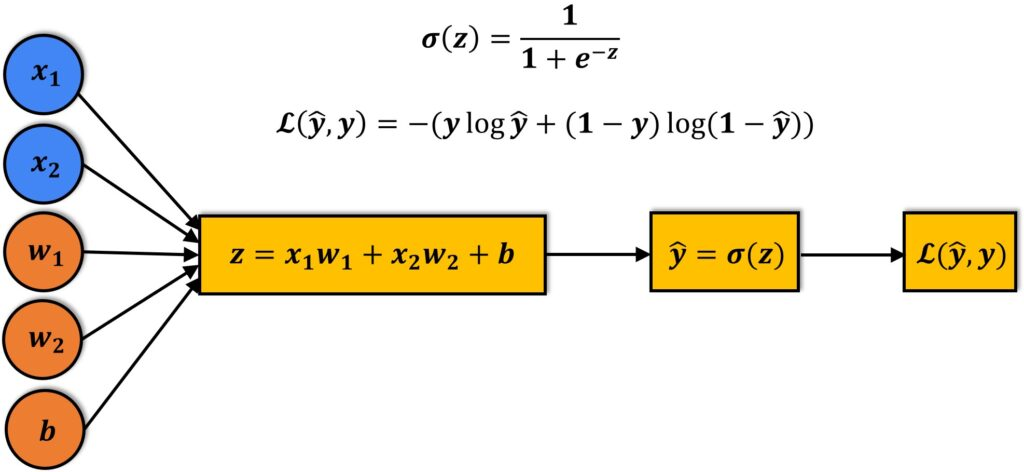

In [95]:
grid = {
    "C": np.logspace(-3, 3, 70), 
    "penalty":["l1", "l2"]}  # l1 lasso, l2 ridge
grid

{'C': array([1.00000000e-03, 1.22167735e-03, 1.49249555e-03, 1.82334800e-03,
        2.22754295e-03, 2.72133877e-03, 3.32459793e-03, 4.06158599e-03,
        4.96194760e-03, 6.06189899e-03, 7.40568469e-03, 9.04735724e-03,
        1.10529514e-02, 1.35031404e-02, 1.64964807e-02, 2.01533769e-02,
        2.46209240e-02, 3.00788252e-02, 3.67466194e-02, 4.48925126e-02,
        5.48441658e-02, 6.70018750e-02, 8.18546731e-02, 1.00000000e-01,
        1.22167735e-01, 1.49249555e-01, 1.82334800e-01, 2.22754295e-01,
        2.72133877e-01, 3.32459793e-01, 4.06158599e-01, 4.96194760e-01,
        6.06189899e-01, 7.40568469e-01, 9.04735724e-01, 1.10529514e+00,
        1.35031404e+00, 1.64964807e+00, 2.01533769e+00, 2.46209240e+00,
        3.00788252e+00, 3.67466194e+00, 4.48925126e+00, 5.48441658e+00,
        6.70018750e+00, 8.18546731e+00, 1.00000000e+01, 1.22167735e+01,
        1.49249555e+01, 1.82334800e+01, 2.22754295e+01, 2.72133877e+01,
        3.32459793e+01, 4.06158599e+01, 4.96194760e+01, 6.0

In [98]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver="liblinear")

logreg_cv = GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.00000000e-03, 1.22167735e-03, 1.49249555e-03, 1.82334800e-03,
       2.22754295e-03, 2.72133877e-03, 3.32459793e-03, 4.06158599e-03,
       4.96194760e-03, 6.06189899e-03, 7.40568469e-03, 9.04735724e-03,
       1.10529514e-02, 1.35031404e-02, 1.64964807e-02, 2.01533769e-02,
       2.46209240e-02, 3.00...
       1.49249555e+01, 1.82334800e+01, 2.22754295e+01, 2.72133877e+01,
       3.32459793e+01, 4.06158599e+01, 4.96194760e+01, 6.06189899e+01,
       7.40568469e+01, 9.04735724e+01, 1.10529514e+02, 1.35031404e+02,
       1.64964807e+02, 2.01533769e+02, 2.46209240e+02, 3.00788252e+02,
       3.67466194e+02, 4.48925126e+02, 5.48441658e+02, 6.70018750e+02,
       8.18546731e+02, 1.00000000e+03]),
                         'penalty': ['l1', 'l2']})

In [99]:
print("tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.04489251258218605, 'penalty': 'l1'}
accuracy : 0.7708245981830888


In [103]:
model = logreg_cv.best_estimator_
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [105]:
lr_probs = model.predict_proba(X_test_scaled)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('ROC AUC для модели: %.3f' % (lr_auc))
fpr, tpr, treshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)

ROC AUC для модели: 0.866


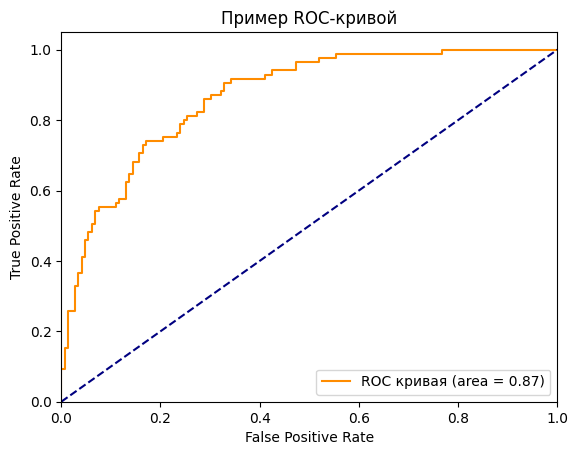

In [106]:
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

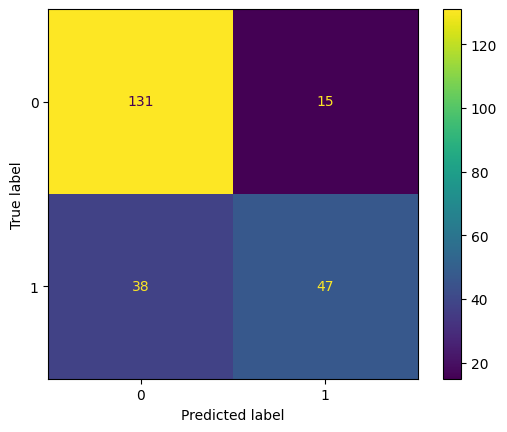

In [107]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

#### Использование метода опорных векторов для классификации

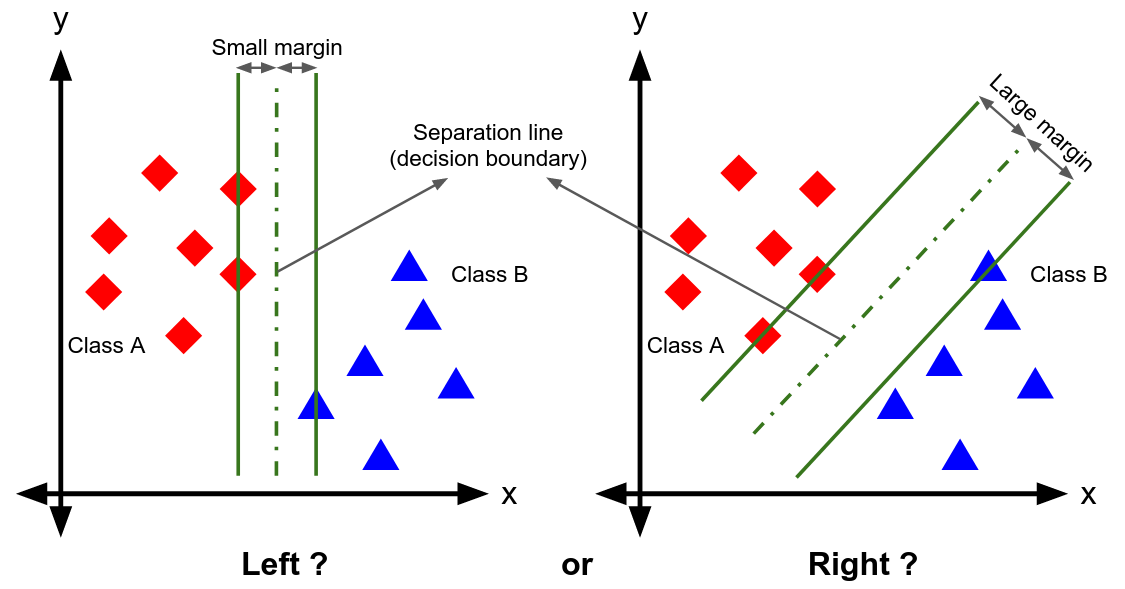

In [108]:
from sklearn import svm
from sklearn.svm import SVC

clf = svm.SVC(C=100, gamma="scale")
clf.fit(X_train_scaled, y_train)

SVC(C=100)

In [109]:
?SVC

#### Получение точности модели на тестовом наборе данных

In [111]:
clf.predict(X_test_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [112]:
y_test

285    0
101    0
581    0
352    0
726    0
      ..
241    0
599    0
650    0
11     1
214    1
Name: diabetes, Length: 231, dtype: int64

In [115]:
score1 = clf.score(X_test_scaled, y_test)
score1

0.70995670995671

In [116]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test_scaled)  
cm = confusion_matrix(y_test, y_pred)
cm

array([[120,  26],
       [ 41,  44]], dtype=int64)

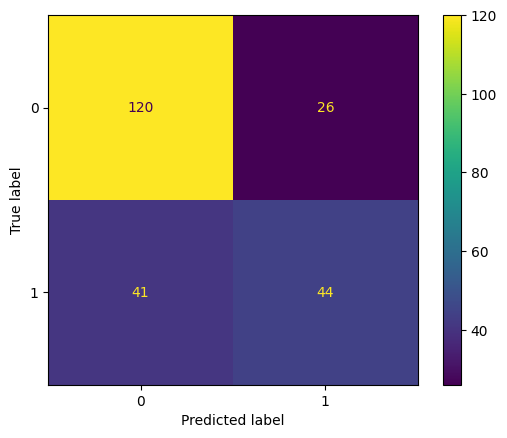

In [117]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

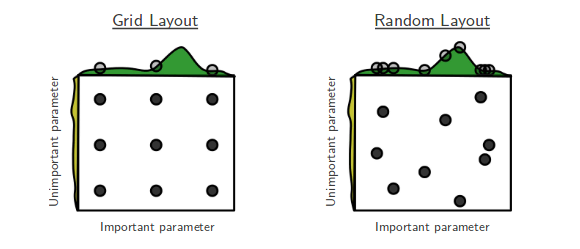